## Bank Personal loan campaign for potential customer analysis Solutions

In [1]:
import warnings 
warnings.filterwarnings('ignore')

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Reading data

In [3]:
df = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
df.head(2)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


In [4]:
df=pd.read_csv('Bank_Personal_Loan_Modelling-1.csv',index_col=0)
df.head(2)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


In [5]:
df2= df[['Personal Loan', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']]
df2.sample(10)

,Personal Loan,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1341,0,35,11,82,94131,4,3.4,1,0,0,0,0,0
379,0,47,23,38,94618,2,2.1,3,0,0,0,0,0
228,0,47,23,148,94551,2,7.5,1,0,0,1,1,1
2206,0,63,37,101,95819,2,2.8,1,0,0,0,0,0
4687,0,61,35,113,91741,2,2.8,1,0,0,0,0,0
4302,1,49,24,130,92677,4,1.1,1,281,0,1,1,0
2149,0,54,30,58,92007,2,3.2,3,0,0,0,0,0
1072,0,39,14,61,94005,3,0.5,3,137,0,0,1,0
895,0,29,4,59,95064,4,2.2,1,232,0,0,1,1


## Basic descriptive statistics EDA

Checking for shape, Null values,data type of the data

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
Personal Loan         5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


#### All the values in the data are non null.In addition to that ,all the results are of int or float type and no non-numeric or special characters values are present inside our data.Data given is clean data.We still need to check for illogical values in each column by looking at a short description of data

#### Description of data in terms of mean,std,min value,max value,quantiles,counts

In [7]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


#### It can be seen that except Professional Experience column, all other values seem to be under logical measures.Experience have -ve value in it which is not possible.The minimum values for Experience can be 0 only.So it is either mistake of -ve sign while typing or any other error.

#### Checking values counts of all the attributes one by one and filling them with logical values like median,mode,ffill,bfill in case of illogical values etc.

#### Checking with categorical values including target variable(Personal Loan,Education, Securities Account,CD Account, Online, CreditCard)

In [8]:
print(df['Personal Loan'].unique())
df2['Personal Loan'].value_counts()

[0 1]


0    4520
1     480
Name: Personal Loan, dtype: int64

No illogical values are present in it and hence no replacing is needed.

In [9]:
print(df['Education'].unique())
df2['Education'].value_counts()

[1 2 3]


1    2096
3    1501
2    1403
Name: Education, dtype: int64

No illogical values are present and hence no replacing is needed

In [10]:
print(df['Securities Account'].unique())
df2['Securities Account'].value_counts()

[1 0]


0    4478
1     522
Name: Securities Account, dtype: int64

No illogical values are present and hence no replacing is needed

In [11]:
print(df['CD Account'].unique())
df2['CD Account'].value_counts()

[0 1]


0    4698
1     302
Name: CD Account, dtype: int64

No illogical values are present and hence no replacing is needed

In [12]:
print(df['Online'].unique())
df2['Online'].value_counts()

[0 1]


1    2984
0    2016
Name: Online, dtype: int64

No illogical values are present and hence no replacing is needed

In [13]:
print(df['CreditCard'].unique())
df2['CreditCard'].value_counts()

[0 1]


0    3530
1    1470
Name: CreditCard, dtype: int64

No illogical values are present and hence no replacing is needed

Checking with numerical values in data (Age,Experience,Income,Family,CCAvg,Mortgage)

In [14]:
print(df['Age'].unique())
(df2['Age'].value_counts())

[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]


35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64

No illogical values are present and hence no replacing is needed

In [15]:
print(df['Family'].unique())
df2['Family'].value_counts()

[4 3 1 2]


1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

No illogical values are present and hence no replacing is needed

In [16]:
print(df['Income'].unique())
(df2['Income'].value_counts())

[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174
  90 179 145 200 183 182  88 160 205 164  14 175 103 108 185 204 154 102
 192 202 162 142  95 184 181 143 123 178 198 201 203 189 151 199 224 218]


44     85
38     84
81     83
41     82
39     81
       ..
189     2
202     2
205     2
224     1
218     1
Name: Income, Length: 162, dtype: int64

No illogical values are present and hence no replacing is needed

In [17]:
print(df['CCAvg'].unique())
(df2['CCAvg'].value_counts())

[ 1.6   1.5   1.    2.7   0.4   0.3   0.6   8.9   2.4   0.1   3.8   2.5
  2.    4.7   8.1   0.5   0.9   1.2   0.7   3.9   0.2   2.2   3.3   1.8
  2.9   1.4   5.    2.3   1.1   5.7   4.5   2.1   8.    1.7   0.    2.8
  3.5   4.    2.6   1.3   5.6   5.2   3.    4.6   3.6   7.2   1.75  7.4
  2.67  7.5   6.5   7.8   7.9   4.1   1.9   4.3   6.8   5.1   3.1   0.8
  3.7   6.2   0.75  2.33  4.9   0.67  3.2   5.5   6.9   4.33  7.3   4.2
  4.4   6.1   6.33  6.6   5.3   3.4   7.    6.3   8.3   6.    1.67  8.6
  7.6   6.4  10.    5.9   5.4   8.8   1.33  9.    6.7   4.25  6.67  5.8
  4.8   3.25  5.67  8.5   4.75  4.67  3.67  8.2   3.33  5.33  9.3   2.75]


0.30    241
1.00    231
0.20    204
2.00    188
0.80    187
       ... 
2.75      1
8.20      1
9.30      1
3.67      1
5.33      1
Name: CCAvg, Length: 108, dtype: int64

No illogical values are present and hence no replacing is needed

In [18]:
print(df['Mortgage'].unique())
(df2['Mortgage'].value_counts())

[  0 155 104 134 111 260 163 159  97 122 193 198 285 412 153 211 207 240
 455 112 336 132 118 174 126 236 166 136 309 103 366 101 251 276 161 149
 188 116 135 244 164  81 315 140  95  89  90 105 100 282 209 249  91  98
 145 150 169 280  99  78 264 113 117 325 121 138  77 158 109 131 391  88
 129 196 617 123 167 190 248  82 402 360 392 185 419 270 148 466 175 147
 220 133 182 290 125 124 224 141 119 139 115 458 172 156 547 470 304 221
 108 179 271 378 176  76 314  87 203 180 230 137 152 485 300 272 144  94
 208 275  83 218 327 322 205 227 239  85 160 364 449  75 107  92 187 355
 106 587 214 307 263 310 127 252 170 265 177 305 372  79 301 232 289 212
 250  84 130 303 256 259 204 524 157 231 287 247 333 229 357 361 294  86
 329 142 184 442 233 215 394 475 197 228 297 128 241 437 178 428 162 234
 257 219 337 382 397 181 120 380 200 433 222 483 154 171 146 110 201 277
 268 237 102  93 354 195 194 238 226 318 342 266 114 245 341 421 359 565
 319 151 267 601 567 352 284 199  80 334 389 186 24

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

No illogical values are present and hence no replacing is needed

In [19]:
print(df['Experience'].unique())
(df2['Experience'].value_counts())

[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]


 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2      85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

In [20]:
df2[df2['Experience']==-1][['Experience','Age','Personal Loan']]

,Experience,Age,Personal Loan
ID,,,
90,-1,25,0
227,-1,24,0
525,-1,24,0
537,-1,25,0
541,-1,25,0
577,-1,25,0
584,-1,24,0
650,-1,25,0
671,-1,23,0


In [21]:
df2[df2['Experience']==-2][['Experience','Age','Personal Loan']]

,Experience,Age,Personal Loan
ID,,,
316,-2,24,0
452,-2,28,0
598,-2,24,0
794,-2,24,0
890,-2,24,0
2467,-2,24,0
2718,-2,23,0
2877,-2,24,0
2963,-2,23,0


In [22]:
df2[df2['Experience']== -3][['Experience','Age','Personal Loan']]

,Experience,Age,Personal Loan
ID,,,
2619,-3,23,0
3627,-3,24,0
4286,-3,23,0
4515,-3,24,0


###### The Professional experience has three illogical values as -1,-2,-3 which is not possible as the minimum value for experiences can be 0 only.A median is not a suitable imputing value here because most of the customers under -1,-2,-3 category are 23 to 29 years old only and it is illogical to have 20 years experience for a 23 ,24 or even 29 years old customer.Minimum and maximum values can not be used too as min value is -3 and max is 43.So replacing the -ve values with  their +ve counter parts of 1,2,3 for experience column.

Checking column for illogical values after replacement with +ve sign

In [23]:
df2.replace({-1:1,-2: 2,-3:3},inplace=True)
print(df2['Experience'].unique())
(df2['Experience'].value_counts())

[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 34  0 38 40 33  4 42 43]


32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
3     133
24    131
16    127
14    127
30    126
34    125
27    125
17    125
22    124
29    124
7     121
6     119
8     119
15    119
10    118
33    117
13    117
37    116
11    116
36    114
21    113
4     113
1     107
31    104
12    102
2     100
38     88
39     85
0      66
40     57
41     43
42      8
43      3
Name: Experience, dtype: int64

No illogical values in the Experience columns any more

## Distribution check

#### Skew and Kurtosis

In [24]:
df2.skew()

Personal Loan          2.743607
Age                   -0.029341
Experience            -0.010038
Income                 0.841339
ZIP Code             -12.500221
Family                 0.155221
CCAvg                  1.598443
Education              0.227093
Mortgage               2.104002
Securities Account     2.588268
CD Account             3.691714
Online                -0.394785
CreditCard             0.904589
dtype: float64

#### The features with positive values of skew indicates data is skewed towards right in those features. The negative values of skew indicates data is skewed towards left in those features.

In [25]:
df2.kurtosis()

Personal Loan           5.529589
Age                    -1.153067
Experience             -1.144457
Income                 -0.044244
ZIP Code              486.204272
Family                 -1.403586
CCAvg                   2.646706
Education              -1.546116
Mortgage                4.756797
Securities Account      4.701013
CD Account             11.633404
Online                 -1.844883
CreditCard             -1.182191
dtype: float64

#### Kurtosis with positive values indicates that those attributes have more data points around the tail

#### Mode

In [26]:
df2.mode()

,Personal Loan,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0,35,32,44,94720,1,0.3,1,0,0,0,1,0


#### IQR of all attributes

In [27]:
df2.quantile(0.75)-df.quantile(0.25)

Age                     20.0
CCAvg                    1.8
CD Account               0.0
CreditCard               1.0
Education                2.0
Experience              20.0
Family                   2.0
Income                  59.0
Mortgage               101.0
Online                   1.0
Personal Loan            0.0
Securities Account       0.0
ZIP Code              2697.0
dtype: float64

#### Range of all attributes

In [28]:
Range = df2.max()-df2.min()
Range

Personal Loan             1.0
Age                      44.0
Experience               43.0
Income                  216.0
ZIP Code              87344.0
Family                    3.0
CCAvg                    10.0
Education                 2.0
Mortgage                635.0
Securities Account        1.0
CD Account                1.0
Online                    1.0
CreditCard                1.0
dtype: float64

#### Variance of all attributes

In [29]:
df2.var()

Personal Loan         8.680136e-02
Age                   1.314042e+02
Experience            1.303065e+02
Income                2.119104e+03
ZIP Code              4.502257e+06
Family                1.317130e+00
CCAvg                 3.054312e+00
Education             7.053801e-01
Mortgage              1.034570e+04
Securities Account    9.351934e-02
CD Account            5.676319e-02
Online                2.406779e-01
CreditCard            2.076055e-01
dtype: float64

#### Standard Deviation of all attributes

In [30]:
df2.std()

Personal Loan            0.294621
Age                     11.463166
Experience              11.415189
Income                  46.033729
ZIP Code              2121.852197
Family                   1.147663
CCAvg                    1.747659
Education                0.839869
Mortgage               101.713802
Securities Account       0.305809
CD Account               0.238250
Online                   0.490589
CreditCard               0.455637
dtype: float64

### Data Visualization

### Univariate Visualization of attributes

In [31]:
sns.set(style="ticks", color_codes=True)

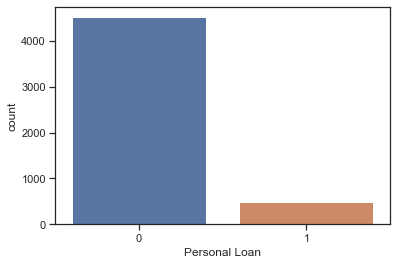

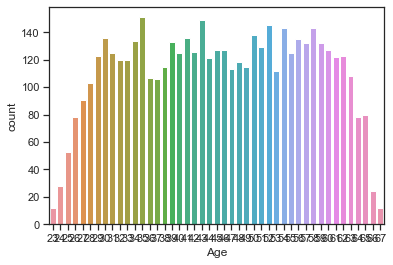

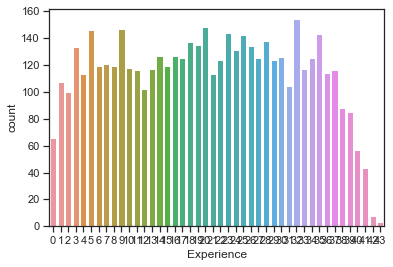

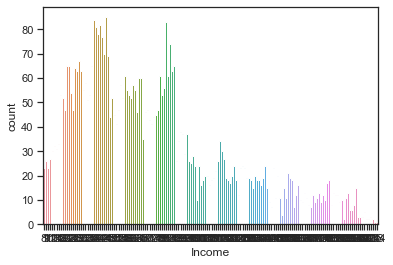

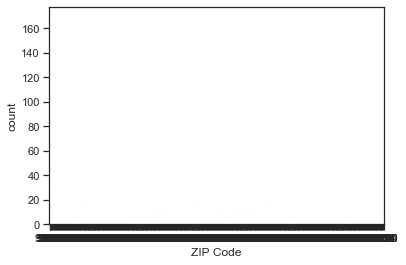

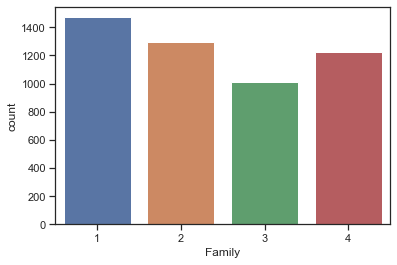

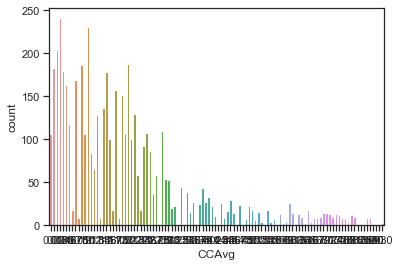

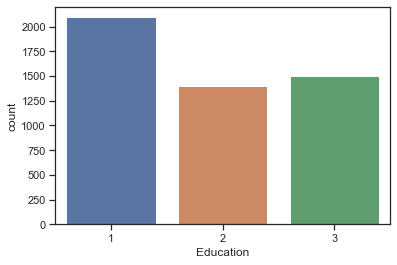

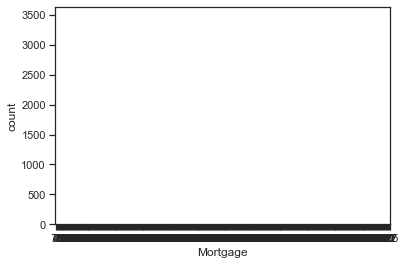

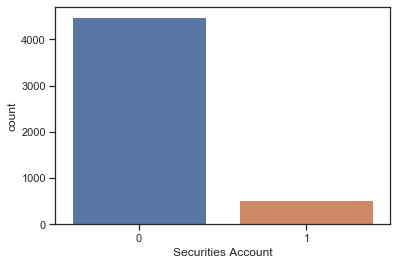

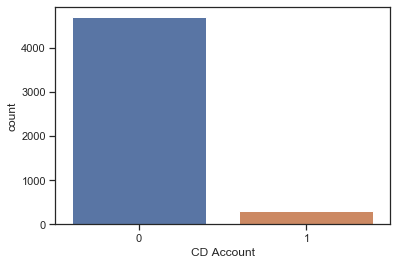

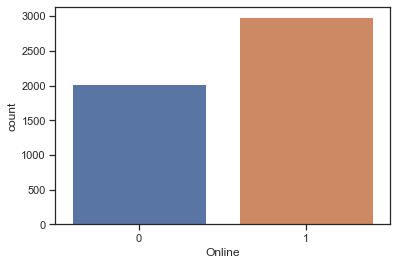

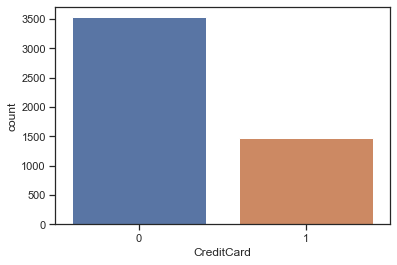

In [32]:
for i, col in enumerate(df2.columns):
    plt.figure(i)
    sns.countplot(x=col, data=df2)

#### It can be seen from the the plots above that data is imbalanced for CreditCard,CD Accounts,Securities Account,CC Average,Personal Loan,Mortgage

### Bivariate Visualization with respect to target variable personal loan along with outliers

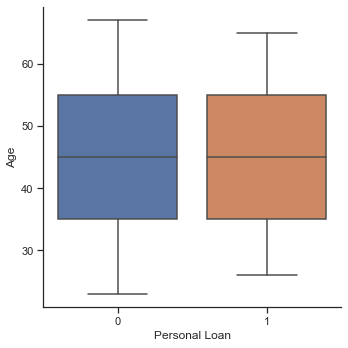

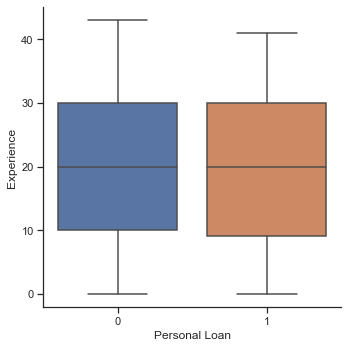

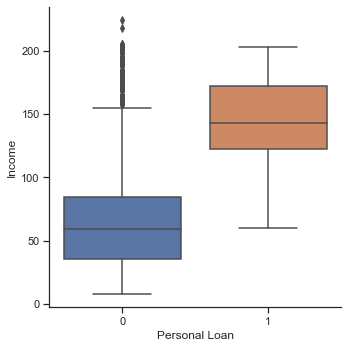

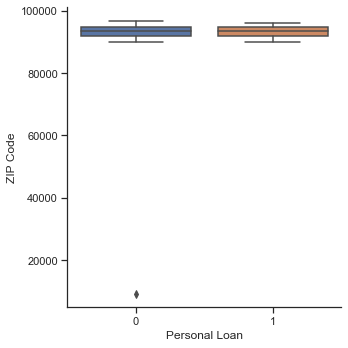

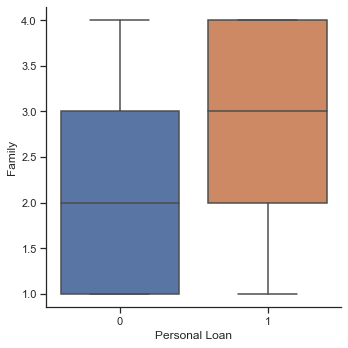

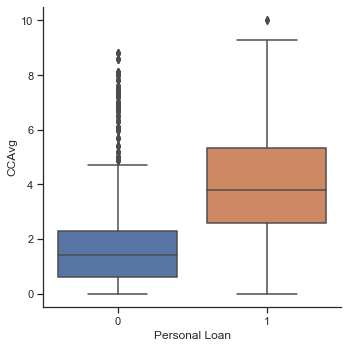

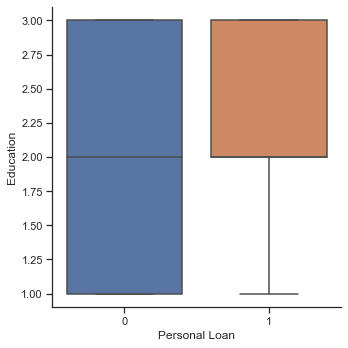

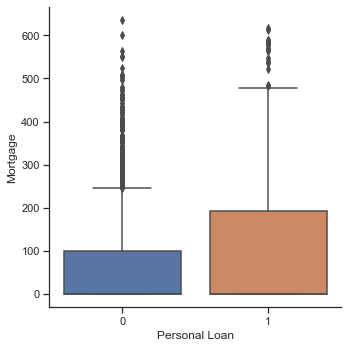

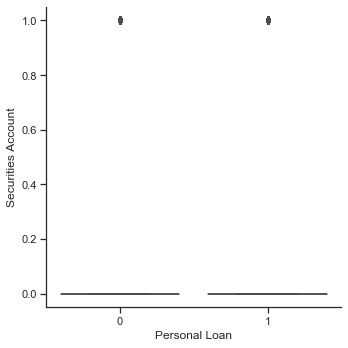

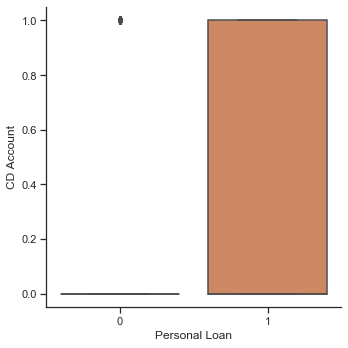

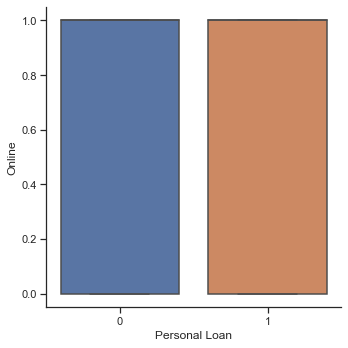

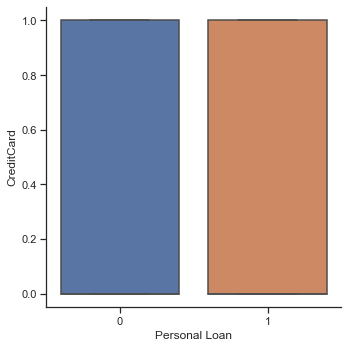

In [33]:
for i in df2:
    if i != 'Personal Loan':
        sns.catplot(x='Personal Loan',y=i,kind='box',data=df2)

###### OBSERVATIONS FROM Bivariate PLOTS

#### 1.It can be seen that in both the cases  most of people who applied for loan and those who didn't ; fall in the age group of 35yrs to 55yrs. The Age is not giving us a useful insights or a pattern for a model .Hence it is a weak predictor for a model.(Weak predictior)

#### 2. It can be seen that in both the cases most of people who applied for loan and who didn't ;mostly have experience between 10yrs to 30 years.The experience feature also is not giving us a useful insight for distinguishing a customer.(Weak predicitor)

#### 3.Customer with Income between 125K USD to 175K USD is more likely to apply for personal loan.(Good predcitor)

#### 4.Zip code seem to  irrelvant feature to know about the potential customer.(Very likely to be dropped ,irrelevant to prediction)

#### 5.Most of the customers who applied for loan have family of 2 or more..(Considerable feature ,check for correlation to make final call on this feature)

#### 6.Customers with CC Avg more than 2K USD but less than 6K USD are more likely to respond to loan campaign .(Good predictor)

#### 7.Customers with education of Graduate level and above  are more likely to apply for loan .(good predictor)

#### 8.People with mortgage less than 200K USD are more prone to apply for personal loans .The potential candidate more likely to  fall between mortage values of 100KUSD and 200KUSD.(Good predictor)

#### 9.People with online banking facility as well as without it are almost equally interested and disinterested in applying personal loans .This does not provide any good insights of the patterns and is a weak predictior.

#### 10.People with credit card and without it are equally interested and disinterested in applying personal loans .This does not provide any good insights of the patterns and is a weak predictior.

#### 11.It can be seen that Income ,CCAVG and Mortgage  have outliers in them and outlier treatment is needed for them before proceeding to model building and other treatments.

## Removing outliers

### Income

##### Outlier Detection

Skewness :  0.8413386072610816
Kurtosis :  -0.04424418973549038
AxesSubplot(0.125,0.125;0.775x0.755)


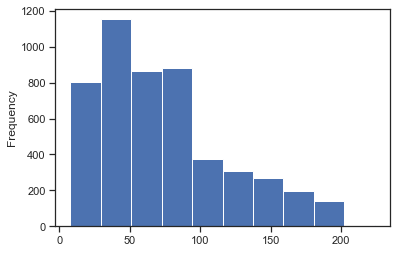

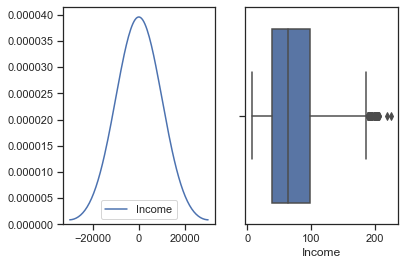

In [34]:
print('Skewness : ',df2['Income'].skew())
print('Kurtosis : ',df2['Income'].kurtosis())
print(df2['Income'].plot.hist(bins=10))
f, axes = plt.subplots(1, 2)
sns.kdeplot(df2['Income'], bw=10000, ax=axes[0])
sns.boxplot(df2['Income'], ax=axes[1])
plt.show()

In [35]:
q3 = df2['Income'].quantile(0.75)
q1 = df2['Income'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print("outliers_above : {}".format(outliers_above))
print("outliers_below : {}".format(outliers_below))

outliers_above : 157.0
outliers_below : -20.0


In [36]:
print(df2['Income'].loc[df2['Income']>outliers_above].count())
print(df2['Income'].loc[df2['Income']<outliers_below].count())
print(df2['Income'].loc[df2['Income']>outliers_above])

372
0
ID
10      180
19      193
28      158
48      194
54      190
       ... 
4874    165
4896    201
4938    162
4982    195
4994    218
Name: Income, Length: 372, dtype: int64


#### Outlier Treatment

In [37]:
median_val = df2['Income'].loc[df2['Income']<=outliers_above].median()
df2['Income'] = df2['Income'].mask(df2['Income']>outliers_above,median_val)
print(df2['Income'].head(20))

ID
1      49
2      34
3      11
4     100
5      45
6      29
7      72
8      22
9      81
10     60
11    105
12     45
13    114
14     40
15    112
16     22
17    130
18     81
19     60
20     21
Name: Income, dtype: int64


#### After treatment

Skewness :  0.6415492948297943
Kurtosis :  -0.26622013026601676
AxesSubplot(0.125,0.125;0.775x0.755)


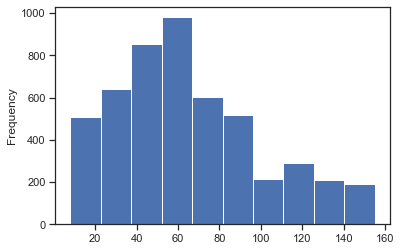

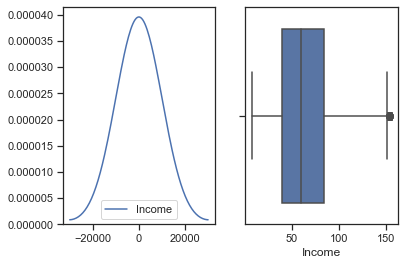

In [38]:
print('Skewness : ',df2['Income'].skew())
print('Kurtosis : ',df2['Income'].kurtosis())
print(df2['Income'].plot.hist(bins=10))
f, axes = plt.subplots(1, 2)
sns.kdeplot(df2['Income'], bw=10000, ax=axes[0])
sns.boxplot(df2['Income'], ax=axes[1])
plt.show()

###### The skew and kurtosis has been reduced from  Skewness :  0.8413386072610816 Kurtosis :  -0.04424418973549038 to Skewness :  0.6415492948297943 Kurtosis :  -0.26622013026601676

### CCAvg
Outlier Detection

Skewness :  1.5984433366678663
Kurtosis :  2.646706374237909
AxesSubplot(0.125,0.125;0.775x0.755)


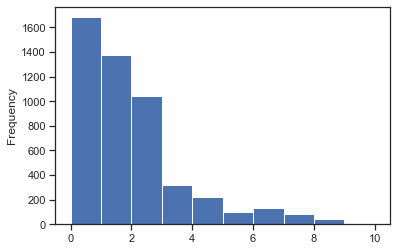

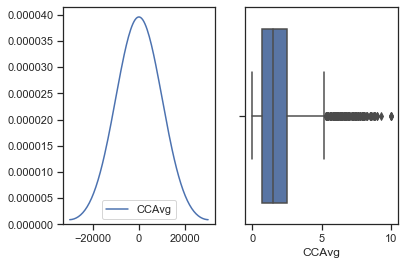

In [39]:
print('Skewness : ',df2['CCAvg'].skew())
print('Kurtosis : ',df2['CCAvg'].kurtosis())
print(df2['CCAvg'].plot.hist(bins=10))
f, axes = plt.subplots(1, 2)
sns.kdeplot(df2['CCAvg'], bw=10000, ax=axes[0])
sns.boxplot(df2['CCAvg'], ax=axes[1])
plt.show()

In [40]:
q3 = df2['CCAvg'].quantile(0.75)
q1 = df2['CCAvg'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print("outliers_above : {}".format(outliers_above))
print("outliers_below : {}".format(outliers_below))

outliers_above : 4.3
outliers_below : -1.1


In [41]:
print(df2['CCAvg'].loc[df2['CCAvg']>outliers_above].count())
print(df2['CCAvg'].loc[df2['CCAvg']<outliers_below].count())
print(df2['CCAvg'].loc[df2['CCAvg']>outliers_above])

489
0
ID
10      8.90
17      4.70
19      8.10
39      5.00
45      5.70
        ... 
4938    8.60
4964    4.50
4965    4.90
4981    5.30
4994    6.67
Name: CCAvg, Length: 489, dtype: float64


Outlier Treatment

In [42]:
median_val = df2['CCAvg'].loc[df2['CCAvg']<=outliers_above].median()
df2['CCAvg'] = df2['CCAvg'].mask(df2['CCAvg']>outliers_above,median_val)
print(df2['CCAvg'].head(20))

ID
1     1.6
2     1.5
3     1.0
4     2.7
5     1.0
6     0.4
7     1.5
8     0.3
9     0.6
10    1.4
11    2.4
12    0.1
13    3.8
14    2.5
15    2.0
16    1.5
17    1.4
18    2.4
19    1.4
20    0.5
Name: CCAvg, dtype: float64


After treatment

Skewness :  0.6341479085162335
Kurtosis :  -0.10616631715981395
AxesSubplot(0.125,0.125;0.775x0.755)


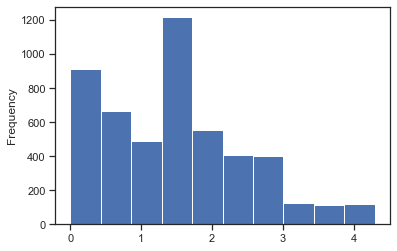

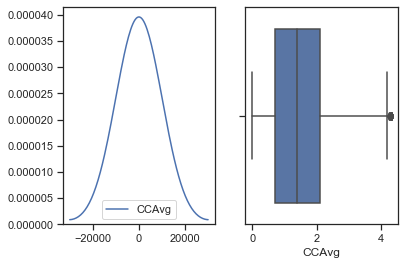

In [43]:
print('Skewness : ',df2['CCAvg'].skew())
print('Kurtosis : ',df2['CCAvg'].kurtosis())
print(df2['CCAvg'].plot.hist(bins=10))
f, axes = plt.subplots(1, 2)
sns.kdeplot(df2['CCAvg'], bw=10000, ax=axes[0])
sns.boxplot(df2['CCAvg'], ax=axes[1])
plt.show()

##### The skew and kurtosis has been reduced from Skewness :  1.5984433366678663 Kurtosis :  2.646706374237909 to Skewness :  0.6341479085162335 Kurtosis :  -0.10616631715981395

#### Mortgage

##### Outlier Detection

Skewness :  2.1040023191079444
Kurtosis :  4.756796669311615
AxesSubplot(0.125,0.125;0.775x0.755)


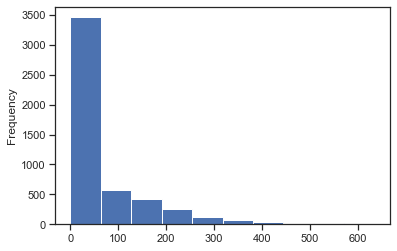

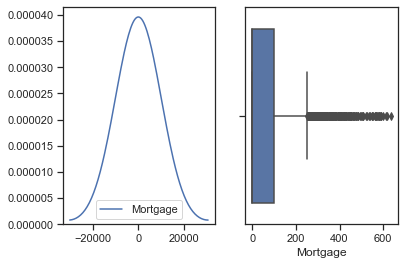

In [44]:
print('Skewness : ',df2['Mortgage'].skew())
print('Kurtosis : ',df2['Mortgage'].kurtosis())
print(df2['Mortgage'].plot.hist(bins=10))
f, axes = plt.subplots(1, 2)
sns.kdeplot(df2['Mortgage'], bw=10000, ax=axes[0])
sns.boxplot(df2['Mortgage'], ax=axes[1])
plt.show()

In [45]:
q3 = df2['Mortgage'].quantile(0.75)
q1 = df2['Mortgage'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print("outliers_above : {}".format(outliers_above))
print("outliers_below : {}".format(outliers_below))

outliers_above : 202.0
outliers_below : -101.0


In [46]:
print(df2['Mortgage'].loc[df2['Mortgage']>outliers_above].count())
print(df2['Mortgage'].loc[df2['Mortgage']<outliers_below].count())
print(df2['Mortgage'].loc[df2['Mortgage']>outliers_above])

494
0
ID
23      260
40      285
43      412
48      211
53      207
       ... 
4950    249
4964    306
4970    250
4980    213
4991    219
Name: Mortgage, Length: 494, dtype: int64


#### Outlier treatment

In [47]:
def remove_outliers(dremove, column , minimum, maximum):
    col_values = dremove[column].values
    dremove[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return dremove

In [48]:
min_val = df2["Mortgage"].min()
max_val = 200
df2 = remove_outliers(dremove=df2, column='Mortgage' , minimum=min_val, maximum=max_val)

#### After Treatment

Skewness :  1.4800261864461197
Kurtosis :  0.9239769507568827
AxesSubplot(0.125,0.125;0.775x0.755)


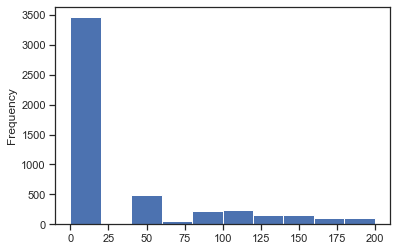

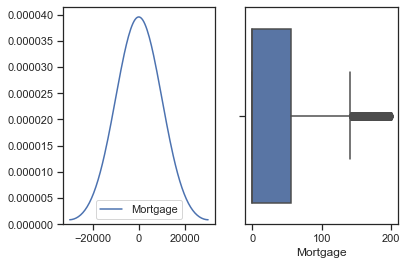

In [49]:
print('Skewness : ',df2['Mortgage'].skew())
print('Kurtosis : ',df2['Mortgage'].kurtosis())
print(df2['Mortgage'].plot.hist(bins=10))
f, axes = plt.subplots(1, 2)
sns.kdeplot(df2['Mortgage'], bw=10000, ax=axes[0])
sns.boxplot(df2['Mortgage'], ax=axes[1])
plt.show()

###### The skew and kurtosis has been reduced from Skewness :  2.1040023191079444 Kurtosis :  4.756796669311615 to Skewness :  1.4800261864461197 Kurtosis :  0.9239769507568827

## Correlation  and Multivariate analysis

In [50]:
corr=df2.corr()
corr

,Personal Loan,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,1.000000,-0.007726,-0.008304,0.300773,0.000107,0.061367,0.208446,0.136722,-0.023754,0.021954,0.316355,0.006278,0.002802
Age,-0.007726,1.000000,0.993991,-0.046617,-0.029216,-0.046418,-0.033662,0.041334,0.000643,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008304,0.993991,1.000000,-0.037897,-0.028936,-0.051851,-0.034635,0.013919,0.000212,-0.000989,0.009735,0.014051,0.008851
Income,0.300773,-0.046617,-0.037897,1.000000,-0.025793,-0.135100,0.375677,-0.186253,-0.085243,0.006337,0.083419,-0.001951,-0.004123
ZIP Code,0.000107,-0.029216,-0.028936,-0.025793,1.000000,0.011778,0.000286,-0.017377,0.005132,0.004704,0.019972,0.016990,0.007691
Family,0.061367,-0.046418,-0.051851,-0.135100,0.011778,1.000000,-0.040809,0.064929,0.019224,0.019994,0.014110,0.010354,0.011588
CCAvg,0.208446,-0.033662,-0.034635,0.375677,0.000286,-0.040809,1.000000,-0.045081,-0.043270,0.018011,0.065542,-0.010371,-0.003947
Education,0.136722,0.041334,0.013919,-0.186253,-0.017377,0.064929,-0.045081,1.000000,0.017971,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.023754,0.000643,0.000212,-0.085243,0.005132,0.019224,-0.043270,0.017971,1.000000,0.000979,0.010841,-0.004776,-0.003908
Securities Account,0.021954,-0.000436,-0.000989,0.006337,0.004704,0.019994,0.018011,-0.010812,0.000979,1.000000,0.317034,0.012627,-0.015028


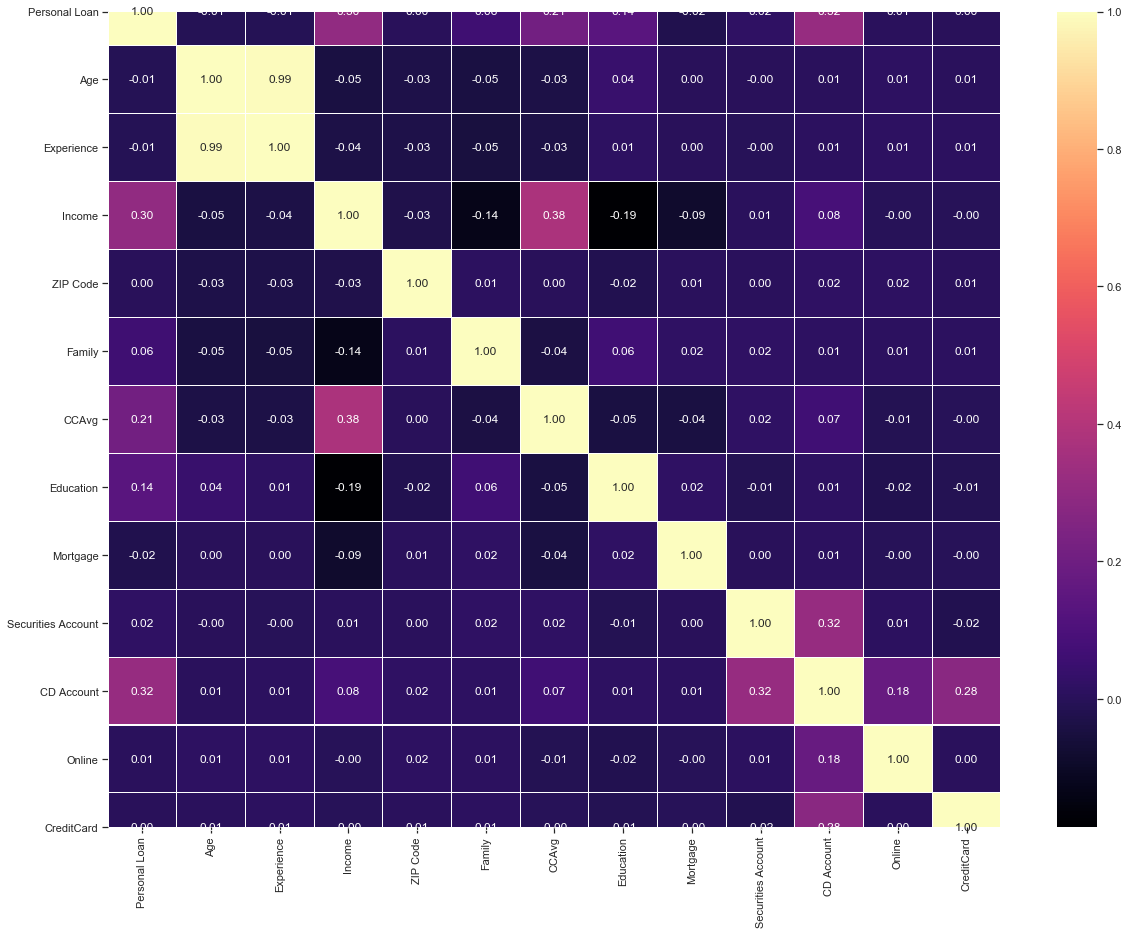

In [51]:
fig,ax = plt.subplots(figsize=(20, 15))   
sns.heatmap(corr, ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") 
plt.show()

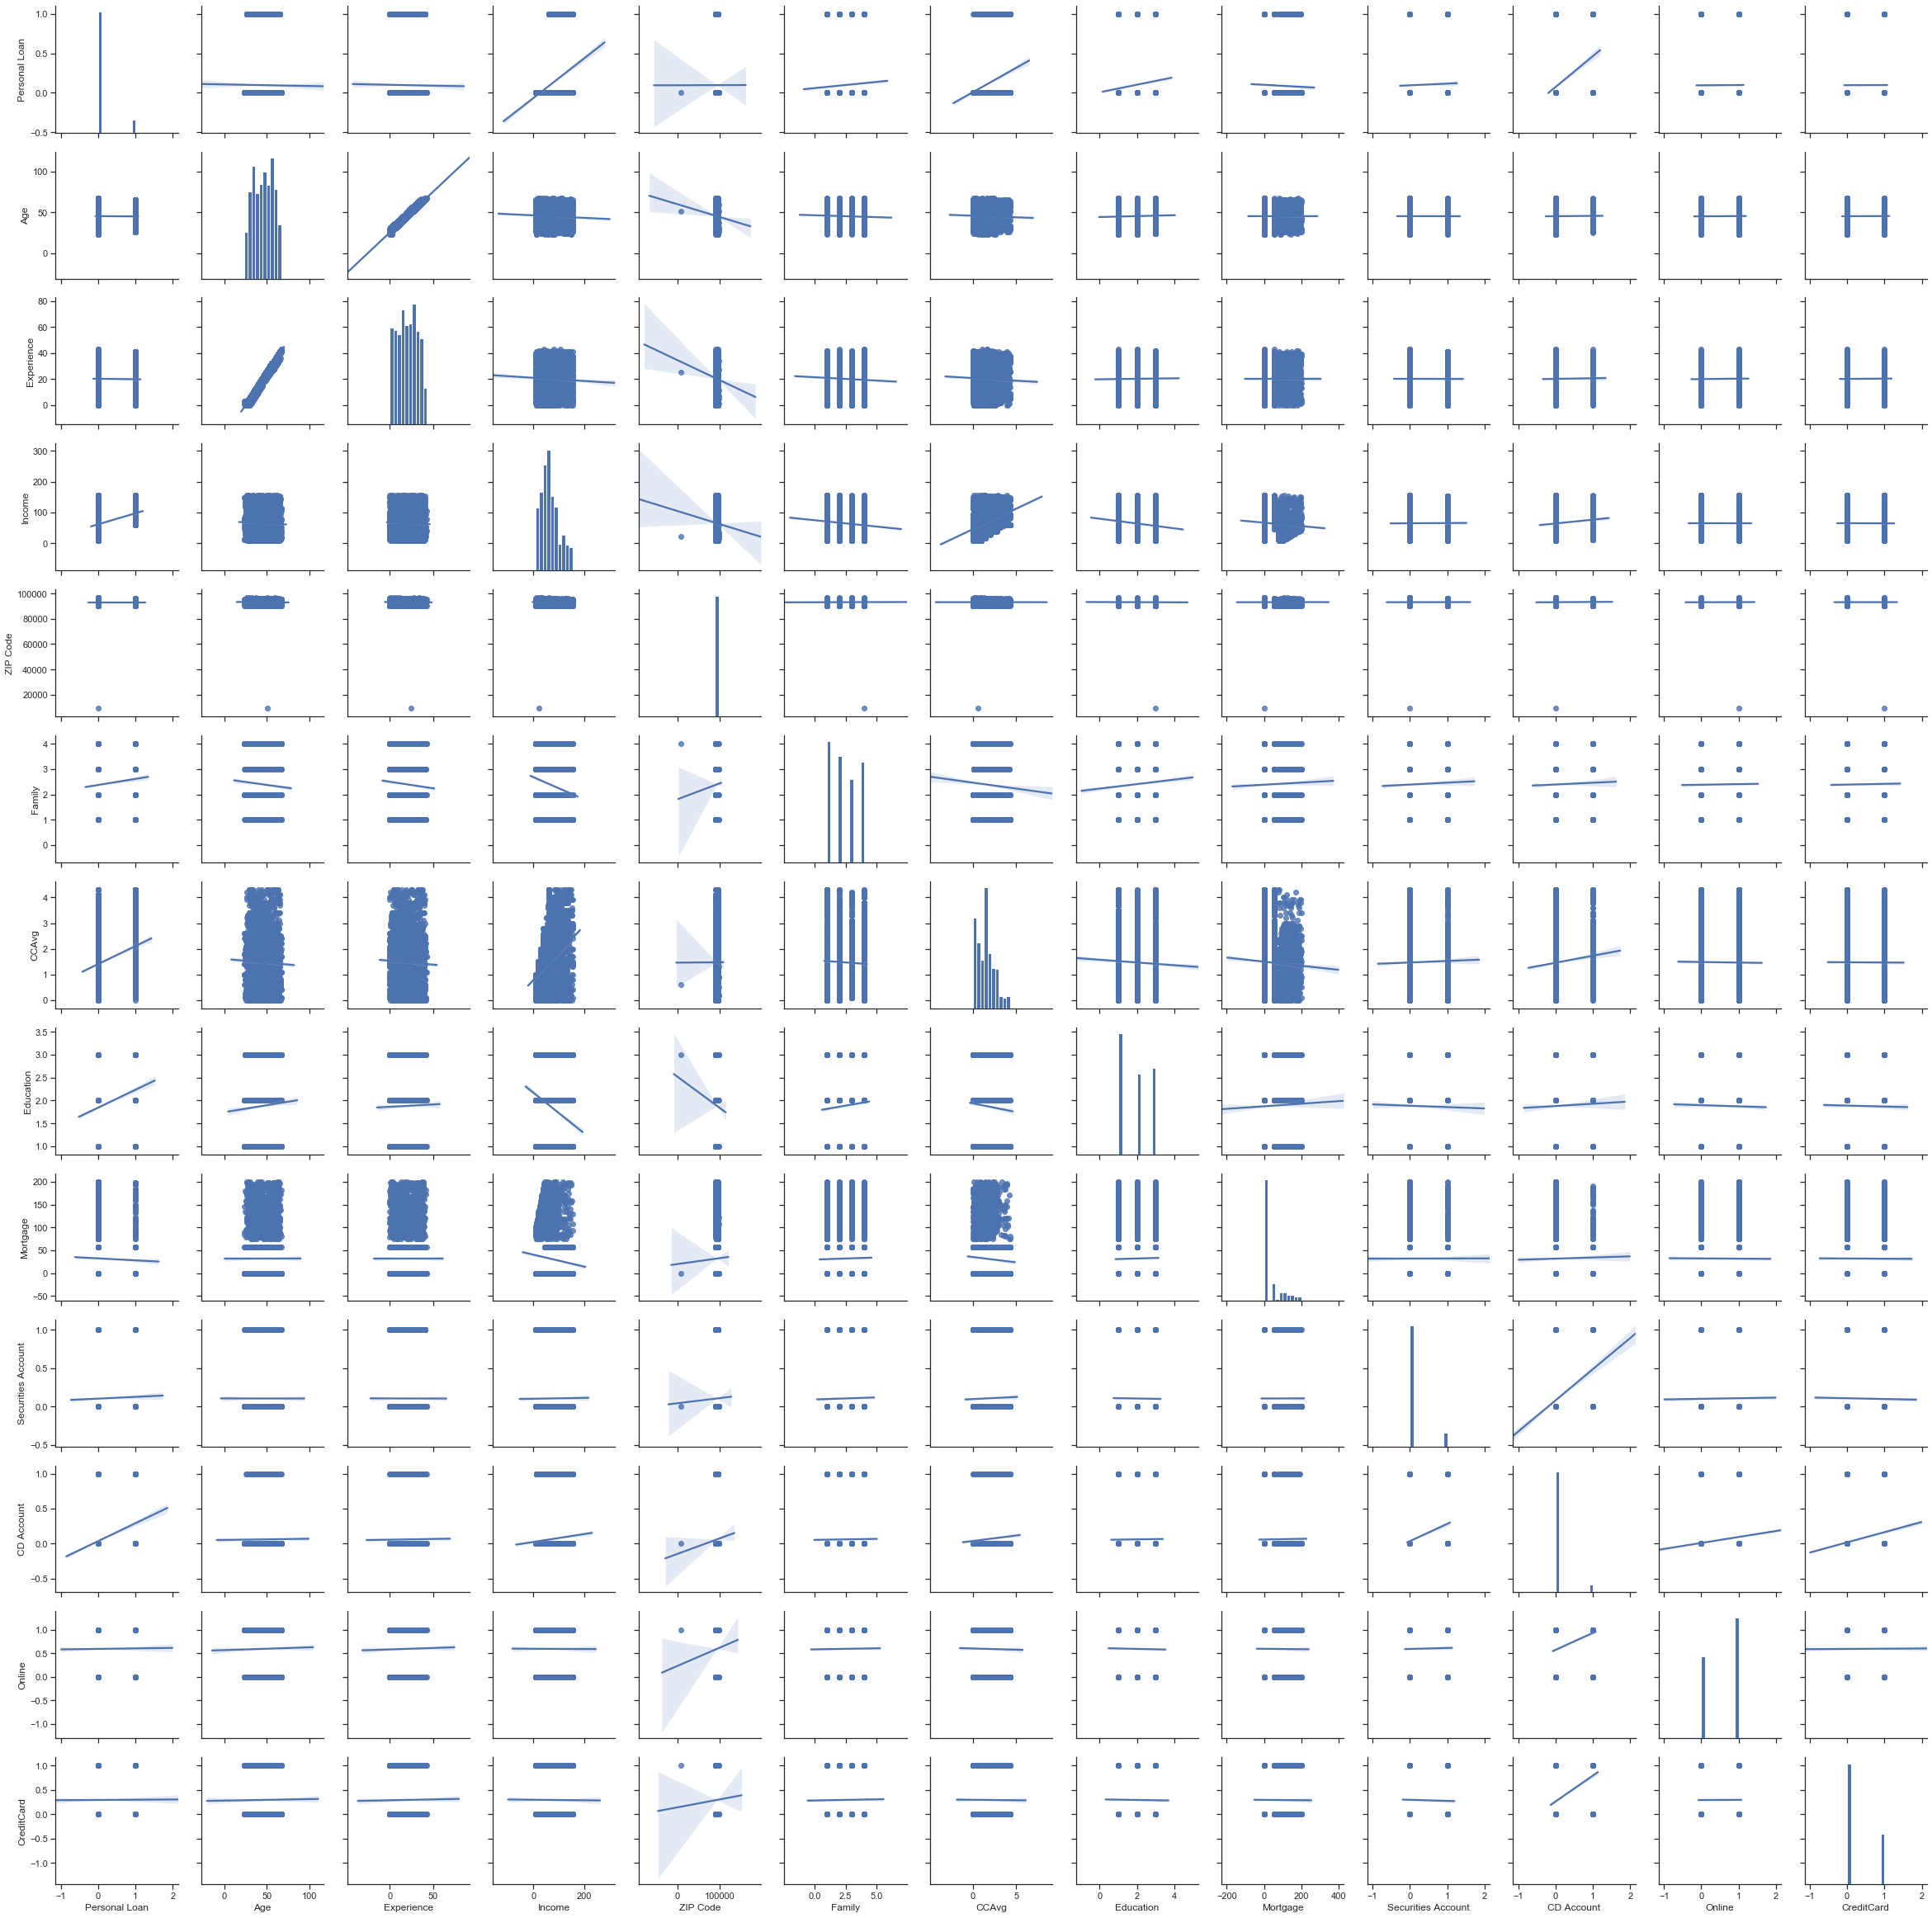

In [52]:
sns.pairplot(df2, kind="reg")
plt.show()

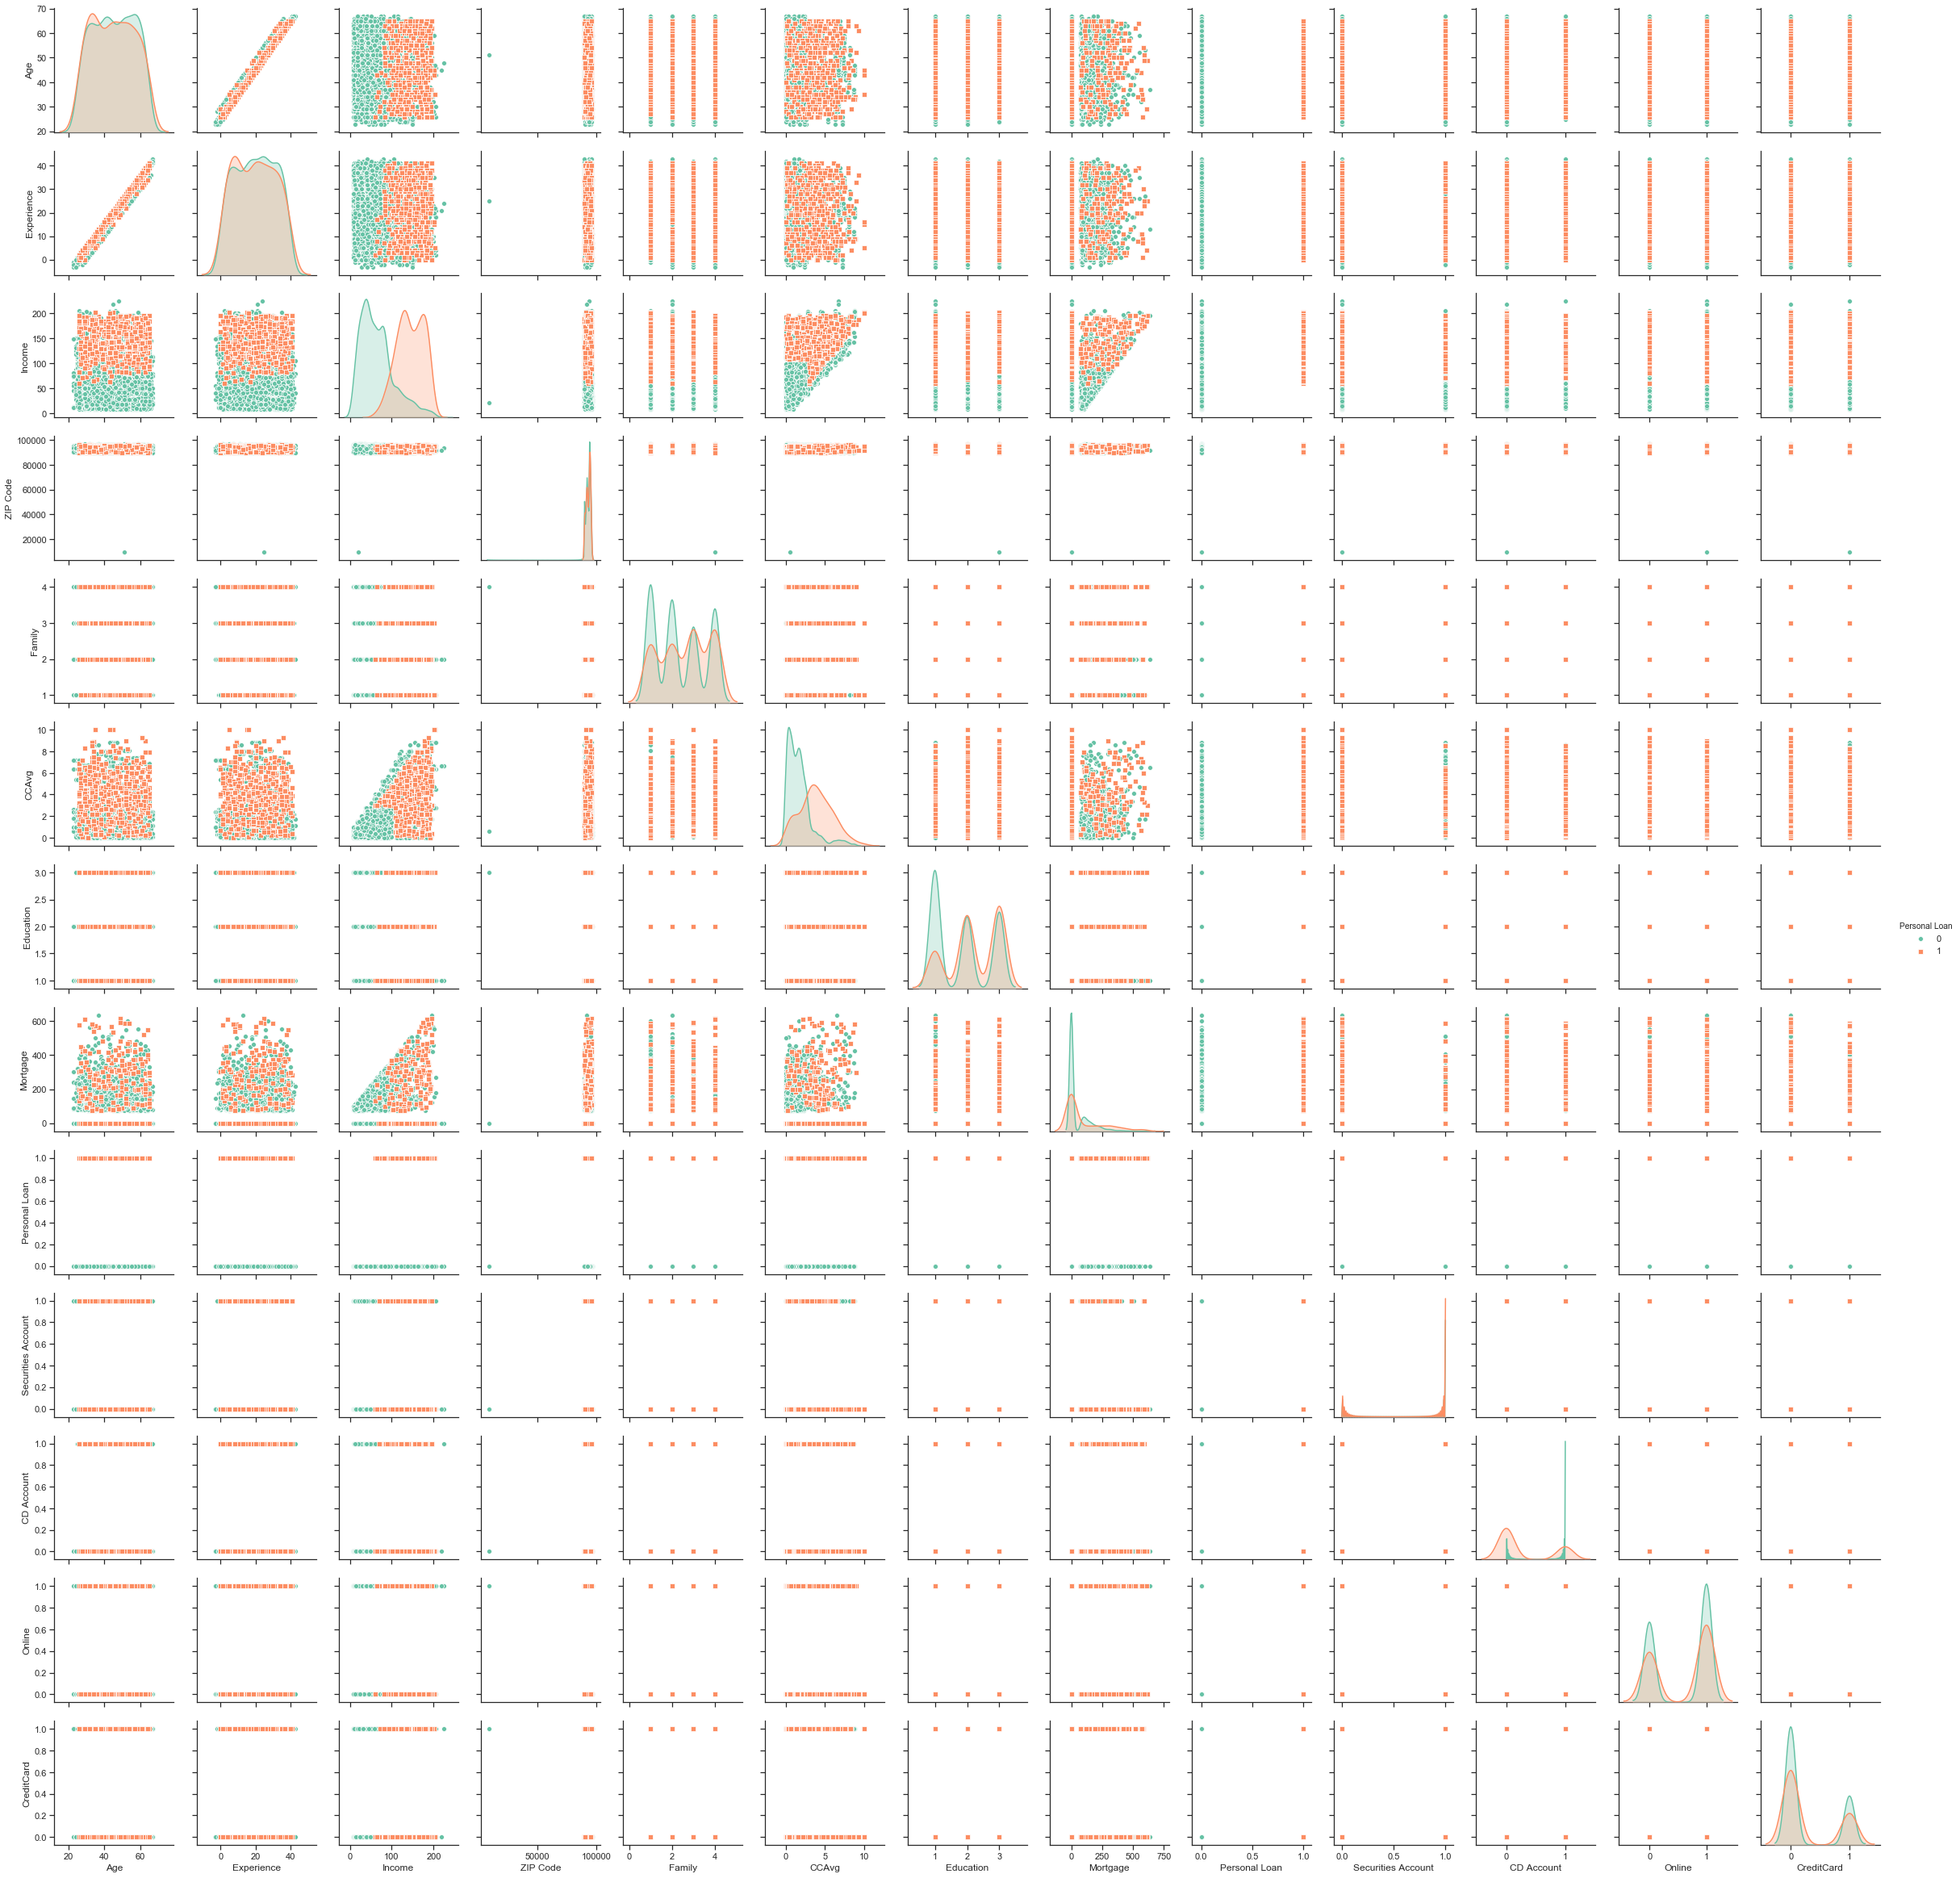

In [53]:
sns.pairplot(df, kind="scatter", hue="Personal Loan", markers=["o", "s"], palette="Set2")
plt.show()

#### It has been observed that Personal loan have good(considerable) correlation with four features that are Income,CCAvg,Education,CD Accounts.
#### Experience and Age are highly correlated with each other
#### It has been observed that personal loan have weak correlation with seven features that are Age,Experience,Zipcode,,Securities account,Online and Credit Card,Mortgage.All of these correlations are within range of -0.1 to 0.1.


### Dropping columns that have minor or close to no effect on target variable 

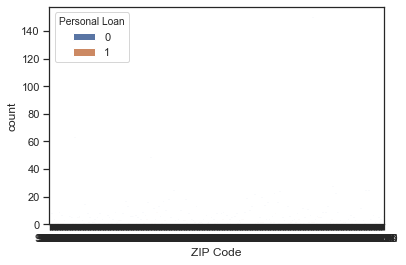

In [54]:
sns.countplot(x='ZIP Code',hue='Personal Loan',data=df2)

#### No useful pattern,skew or kurtosis can be seen from this features and can be dropped.

In [55]:
df2 = df2.drop('ZIP Code',axis=1)

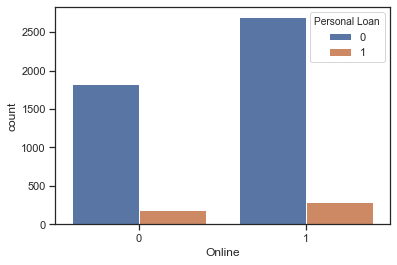

In [56]:
sns.countplot(x='Online',hue='Personal Loan',data=df2)

#### It can be seen that the ratio of conversion for customer with online banking  as well as without it in terms of approached to positive response is almost same. Customer  with online banking and customer without it is almost equally interested and disinterested in applying for personal Loan.This wont give us a good pattern in terms of predictions.Hence this features is of very less importance and can be dropped after correlation check

In [57]:
df2 = df2.drop('Online',axis=1)

#### Age and Experience are highly correlated with each other and have corr =0.99 .But Experience has comparitively slightly better correlation with target variable .Age-PLoan corr = 0.007726, Experience-PLoan corr = -0.008304. So dropping Age would be slightly better over Experience if any of them needed to be dropped.For the time being i m keeping both of them

In [58]:
df2.head(3)

,Personal Loan,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,CreditCard
ID,,,,,,,,,,,
1,0,25,1,49,4,1.6,1,0.0,1,0,0
2,0,45,19,34,3,1.5,1,0.0,1,0,0
3,0,39,15,11,1,1.0,1,0.0,0,0,0


In [59]:
type(df2)

pandas.core.frame.DataFrame

### Splitting into train and test data(70:30)

In [60]:
df2.columns

Index(['Personal Loan', 'Age', 'Experience', 'Income', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account', 'CD Account',
       'CreditCard'],
      dtype='object')

In [61]:
X = df2[['Experience','Income','Age','Family', 'CCAvg','Education','Mortgage', 'Securities Account', 'CD Account','CreditCard']]
Y = df2['Personal Loan']

In [62]:
print(X.shape)
print(X.sample(1))

(5000, 10)
      Experience  Income  Age  Family  CCAvg  Education  Mortgage  \
ID                                                                  
2913          20     130   44       4    3.2          2       0.0   

      Securities Account  CD Account  CreditCard  
ID                                                
2913                   0           0           0  


In [63]:
print(Y.shape)
Y.sample(2)

(5000,)


ID
3156    0
2850    0
Name: Personal Loan, dtype: int64

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [65]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)

In [66]:
X_train.shape

(3500, 10)

#### Building different Models and validating using 10 fold cross validation¶

In [67]:
models = []
models.append(('ADA', AdaBoostClassifier(n_estimators = 120)))
models.append(('RandForest',RandomForestClassifier(max_depth = 8, n_estimators = 120)))
models.append(('Gaussian', GaussianNB()))
models.append(('Decison-Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))

In [68]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {}".format(name, cv_results.mean())
    print(msg)

ADA: 0.9608571428571429
RandForest: 0.9608571428571426
Gaussian: 0.9019999999999999
Decison-Tree: 0.966
KNN: 0.933142857142857
LR: 0.9297142857142857


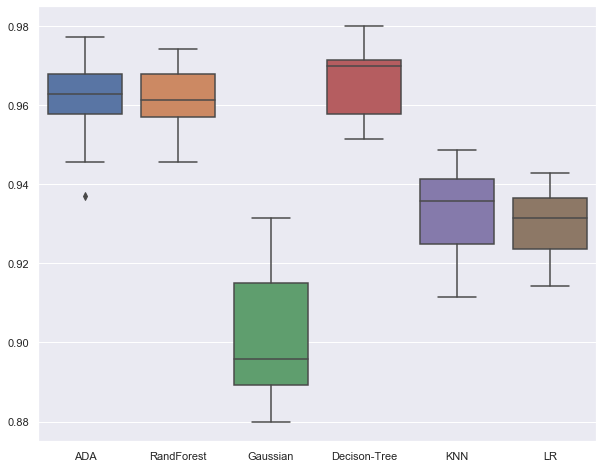

In [69]:
sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(names,results)

#### Decision-Tree model obtained the highest accuracy while cross validation .ADA and RandForest  models obtained good accuracies which are slightly less than Decision-Tree but have very small difference between them .However these accuracies are more than KNN and LR models.GaussianNB obtained the lowest accuracy among all of them.

#### Testing with the test data for three different models mentioned in Assignment ,((Logistic, K-NN and Naïve Bayes))

In [70]:
scaler.fit(X_test)
X_test = scaler.fit_transform(X_test)

## LR model

In [71]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_test)
print("Accuracy : ", accuracy_score(Y_test, predictions))
print("Confusion Matrix : \n",confusion_matrix(Y_test, predictions))
print("Classification Report: \n",classification_report(Y_test, predictions))

Accuracy :  0.9233333333333333
Confusion Matrix : 
 [[1327   16]
 [  99   58]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      1343
           1       0.78      0.37      0.50       157

    accuracy                           0.92      1500
   macro avg       0.86      0.68      0.73      1500
weighted avg       0.92      0.92      0.91      1500



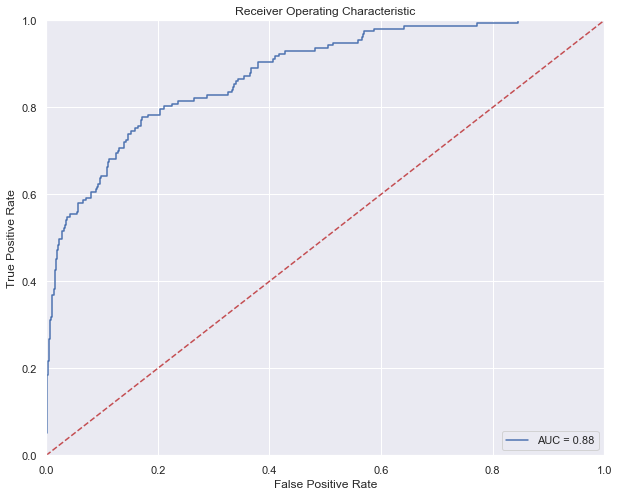

In [72]:
probs = lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Summary:
###### Class 1 : is our positive parameter(customer who took the personal loan)
###### Class 0 : is our  negative parameter  (customer who didn't took the loan)

The model has tested total of 1500 values from data out of which 1343 were of class 0 and 157 of class 1.

Out of 1343 values of class 0,1327 has been classified accurately as class 0 where as 16 are misclassified as class 1 i.e 1327 true negatives and 16 false positive predictions by LR model.

Out of 157 values of class 1 ,58 has been classified accurately as class 1 where as 99 are missclassified as class 0 i.e.58 true positives and 99 False negative predictions by LR model.

## Naïve Bayes Model(GaussianNB)

In [73]:
GNB = GaussianNB()
GNB.fit(X_train, Y_train)
predictions = GNB.predict(X_test)
print("Accuracy : ", accuracy_score(Y_test, predictions))
print("Confusion Matrix : \n",confusion_matrix(Y_test, predictions))
print("Classification Report: \n",classification_report(Y_test, predictions))

Accuracy :  0.8993333333333333
Confusion Matrix : 
 [[1295   48]
 [ 103   54]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      1343
           1       0.53      0.34      0.42       157

    accuracy                           0.90      1500
   macro avg       0.73      0.65      0.68      1500
weighted avg       0.88      0.90      0.89      1500



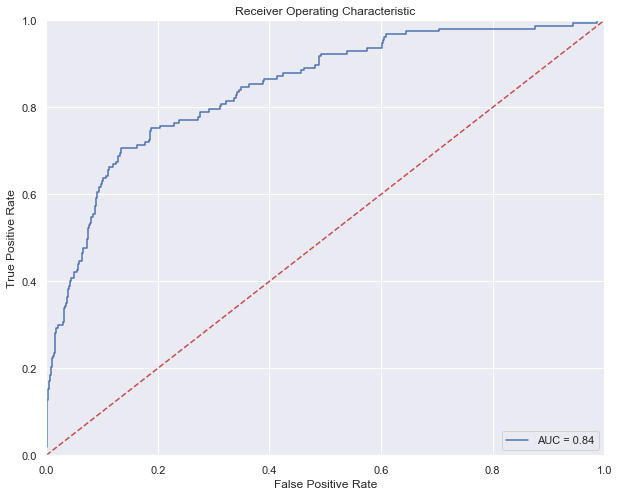

In [74]:
probs = GNB.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Summary:
###### Class 1 : is our positive parameter(customer who took the personal loan)
###### Class 0 : is our  negative parameter  (customer who didn't took the loan)

The model has tested total of 1500 values from data out of which 1343 were of class 0 and 157 of class 1.

Out of 1343 values of class 0,1295 has been classified accurately as class 0 where as 48 are misclassified as class 1 i.e 1295 true negatives and 48 false positive predictions by GaussianNB model.

Out of 157 values of class 1 ,54 has been classified accurately as class 1 where as 103 are missclassified as class 0 i.e.54 true positives and 103 False negative predictions by GaussianNB model.

## KNN Model

In [75]:
scoretest=[]

In [76]:
for k in range (1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    scoretest.append(accuracy_score(knn.predict(X_test),Y_test))
print('Testing accuracy of model for various values of k are =',scoretest)

Testing accuracy of model for various values of k are = [0.9293333333333333, 0.9306666666666666, 0.924, 0.9253333333333333, 0.9226666666666666, 0.9213333333333333, 0.9213333333333333, 0.9213333333333333, 0.9206666666666666, 0.9226666666666666]


It can be seen that at K= 3 we have maximum accuracy,Running and printing confusion matrix for K=3

In [77]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
print("Accuracy : ", accuracy_score(Y_test, predictions))
print("Confusion Matrix : \n",confusion_matrix(Y_test, predictions))
print("Classification Report: \n",classification_report(Y_test, predictions))

Accuracy :  0.9306666666666666
Confusion Matrix : 
 [[1316   27]
 [  77   80]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      1343
           1       0.75      0.51      0.61       157

    accuracy                           0.93      1500
   macro avg       0.85      0.74      0.78      1500
weighted avg       0.92      0.93      0.92      1500



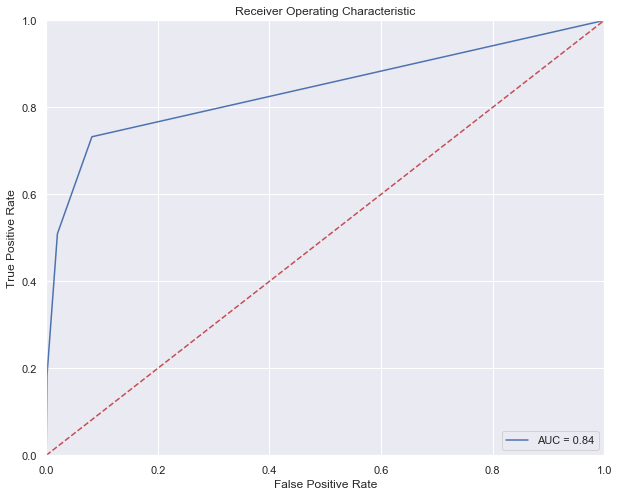

In [78]:
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Summary:
###### Class 1 : is our positive parameter(customer who took the personal loan)
###### Class 0 : is our  negative parameter  (customer who didn't took the loan)

The model has tested total of 1500 values from data out of which 1343 were of class 0 and 157 of class 1.

Out of 1343 values of class 0,1316 has been classified accurately as class 0 where as 27 are misclassified as class 1 i.e 1316 true negatives and 27 false positive predictions by KNN model.

Out of 157 values of class 1 ,80 has been classified accurately as class 1 where as 77 are missclassified as class 0 i.e.80 true positives and 77 False negative predictions by KNN model.

## Decision Tree Model

In [79]:
DT = DecisionTreeClassifier(criterion = 'entropy' ,random_state=0,max_depth=5)
DT.fit(X_train, Y_train)
predictions = DT.predict(X_test)
print("Accuracy : ", accuracy_score(Y_test, predictions))
print("Confusion Matrix : \n",confusion_matrix(Y_test, predictions))
print("Classification Report: \n",classification_report(Y_test, predictions))

Accuracy :  0.964
Confusion Matrix : 
 [[1320   23]
 [  31  126]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.85      0.80      0.82       157

    accuracy                           0.96      1500
   macro avg       0.91      0.89      0.90      1500
weighted avg       0.96      0.96      0.96      1500



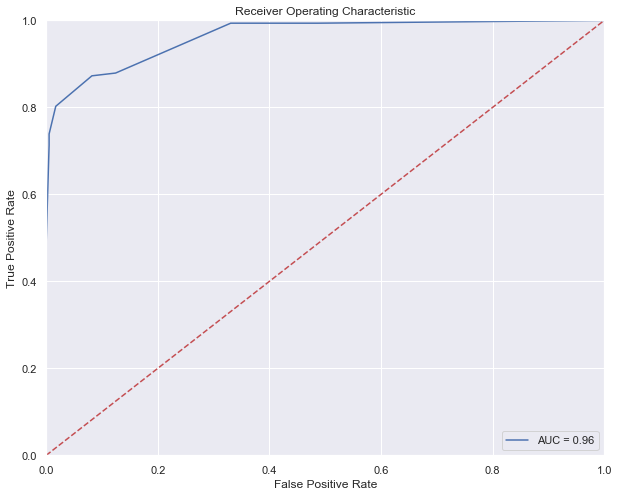

In [80]:
probs =DT.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Summary:
###### Class 1 : is our positive parameter(customer who took the personal loan)
###### Class 0 : is our  negative parameter  (customer who didn't took the loan)

The model has tested total of 1500 values from data out of which 1343 were of class 0 and 157 of class 1.

Out of 1343 values of class 0,1320 has been classified accurately as class 0 where as 23 are misclassified as class 1 i.e 1320 true negatives and 23 false positive predictions by Decision-Tree model.

Out of 157 values of class 1 ,126 has been classified accurately as class 1 where as 31 are missclassified as class 0 i.e.126 true positives and 31 False negative predictions by Decision-Tree model.

#### Over all Summary of model building and case study

###### Accuracy of 96.4 % with recall value of 80% for class 1 prediction is recorded in  Decision Tree model .This is the highest accuracy percentage  among all the models trained and tested above.Our conclusion is that, "Decision Tree" is suitable one for the detection of potential customer of Loan campaign for a given data ,when compared to all other models above.